<a href="https://colab.research.google.com/github/ShaamNatheshwar/deep_learning/blob/main/LinearRegreesion%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Linear regression

In [2]:
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, unicode_literals, division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [4]:
# loading the data

In [5]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [6]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [8]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [10]:
dftrain.describe(include='all')

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
count,627,627.000000,627.000000,627.000000,627.000000,627,627,627,627
unique,2,NaN,NaN,NaN,NaN,3,8,4,2
top,male,NaN,NaN,NaN,NaN,Third,unknown,Southampton,y
freq,410,NaN,NaN,NaN,NaN,341,481,450,372
mean,NaN,29.631308,0.545455,0.379585,34.385399,NaN,NaN,NaN,NaN
std,NaN,12.511818,1.151090,0.792999,54.597730,NaN,NaN,NaN,NaN
min,NaN,0.750000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,23.000000,0.000000,0.000000,7.895800,NaN,NaN,NaN,NaN
50%,NaN,28.000000,0.000000,0.000000,15.045800,NaN,NaN,NaN,NaN
75%,NaN,35.000000,1.000000,0.000000,31.387500,NaN,NaN,NaN,NaN


In [11]:
# visualize the data

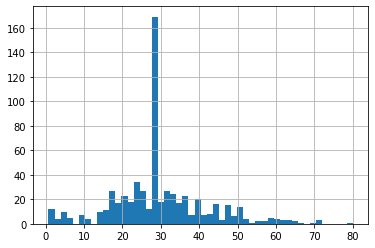

In [12]:
dftrain['age'].hist(bins=50)

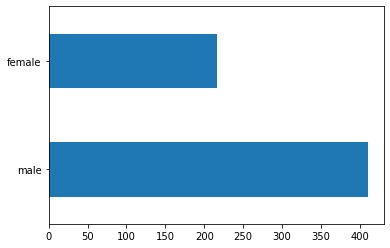

In [15]:
dftrain.sex.value_counts().plot(kind='barh')

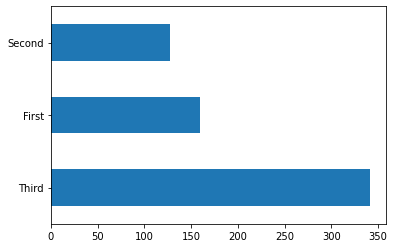

In [16]:
dftrain['class'].value_counts().plot(kind='barh')

In [17]:
dftrain.columns.values

array(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class',
       'deck', 'embark_town', 'alone'], dtype=object)

In [19]:
CATEGORICAL_COLUMN = ['sex', 'n_siblings_spouses', 'parch','deck', 'embark_town', 'alone']
NUMERICAL_COLUMN = ['age','fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMN :
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERICAL_COLUMN:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(k

In [42]:
def make_input_function (data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) 
    if shuffle:
     ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_function(dftrain,y_train)
eval_input_fn = make_input_function(dfeval, y_eval, num_epochs=1, shuffle=False)



In [43]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3ntwst3z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.74242425
